# 01 PyTorch Workflow

### End-to-end PyTorch Workflow

Resource:
[torch.nn Documentation](https://docs.pytorch.org/docs/stable/nn.html)

### Workflow

1. [Get the Data Ready](#1-get-the-data-ready)  
2. [Build a Model](#2-build-a-model)  
3. [Fit the model](#3-fit-the-model)  
4. [Evaluate the model](#4-evaluate-the-model)  
5. [Improve the model](#5-improve-the-model)  
6. [Save and Reload the model](#6-save-and-reload-the-model)  
7. [Put it all together](#7-put-it-all-together)

<a id="1-get-the-data-ready"></a>
## 1. Get the Data Ready

Data from:
1. Excel spreadsheet
2. Images
3. Videos
4. Audio
5. DNA
6. Text

* Get data into a numerical representation
* Build a model to learn patterns in that numerical representation

In [2]:
import torch

In [3]:
# Create the known parameters
weight = 0.6
bias = 0.2

#Create tensor
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [4]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2000],
         [0.2120],
         [0.2240],
         [0.2360],
         [0.2480],
         [0.2600],
         [0.2720],
         [0.2840],
         [0.2960],
         [0.3080]]))

In [5]:
len(X), len(y)

(50, 50)

## Split data into training and test sets

#### Create a training and teset set with the data

In [6]:
#Create a train/test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [7]:
len(X_train), len(y_train)

(40, 40)

In [8]:
len(X_test), len(y_test)

(10, 10)

## Visualize the data

In [9]:
import matplotlib.pyplot as plt

def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data = X_test,
                    test_labels=y_test,
                    predictions=None):

    """
    Plot training data, test data and compares predictions
    """

    plt.figure(figsize=(10,7))

    #Plot the training data in blue
    plt.scatter(train_data, train_labels, c='b', s=4, label='Training Data')

    #Plot the test data in gree
    plt.scatter(test_data, test_labels, c='g', s=4, label='Test Data')


    #Are there predictions?
    if predictions is not None:
        #plot the prediction if they exist
        plt.scatter(test_data, predictions, c='r',s=8,label='Predictions')

    #show the legend
    plt.legend(prop={'size': 14})

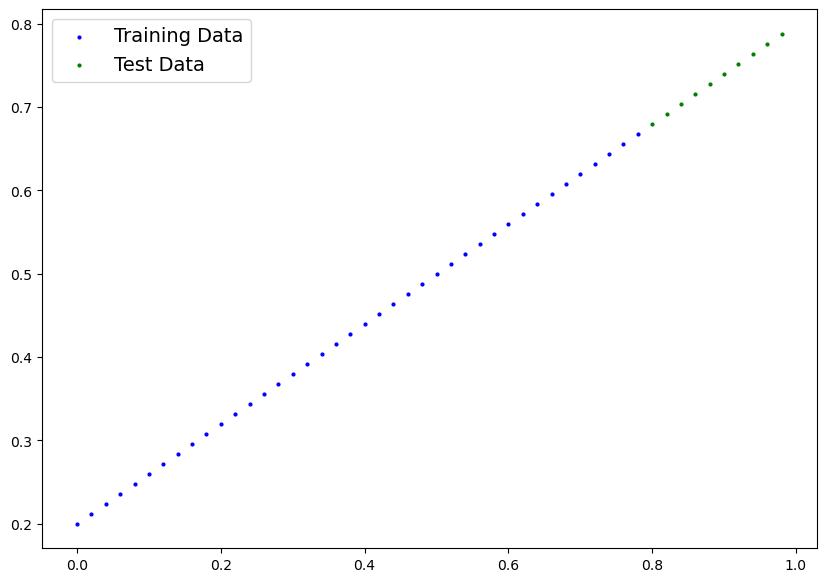

In [10]:
plot_predictions()

<a id="2-build-a-model"></a>
## 2. Build a Model

In [11]:
## Create the Model
from torch import nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        #Initialize model Parameters
        self.weights = nn.Parameter(torch.randn(1,
                                               requires_grad=True,
                                               dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))

    #Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

## PyTorch Essential Nueral Network Building Modules
---
Reference:
**[PyTorch CheatSheet](https://docs.pytorch.org/tutorials/beginner/ptcheat.html)**

---
| PyTorch Module | What does it do? | 
|:--------------:|:----------------:|
|  torch.nn      |  Contains all of the building blocks for computational graphs(essentially a series of computations executed in a particular way)   |  
|  torch.nn.Module        |  The base class of all neural network modules, all the building blocks for neural networks are subclass. If you're building a neural network in PyTorch, your models should subclass `nn.Module`. Requires a `forward()` method to be implemented|
|  torch.optim       |  Contains various optimization algorithms (these tell the model parameters stored in nn.Parameter, how to best change to improve gradient descent and in turn reduce the loss)   |
| torch.utils.data.Dataset | Represent a map between key (label) and sample (features) pairs of your data. Such as images and their associated labels.|
|torch.utils.data.DataLoader| Creates a Python iterable overa torch Dataset (allows you to iterate over your data|

---

## PyTorch model building essentials

In [51]:
# Create a random seed
torch.manual_seed(42)

#Create an instance of the model
model_0 = LinearRegressionModel()

#Check the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [52]:
# List named parameters
model_0.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making Prediction using `torch.inference_mode()`
To check our model's predictive power, let's see how we;; it predicts y_test based on X_test.
When we pass data through our model, it's going to run it through the forward() method.


In [53]:
# Make prediction with model
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

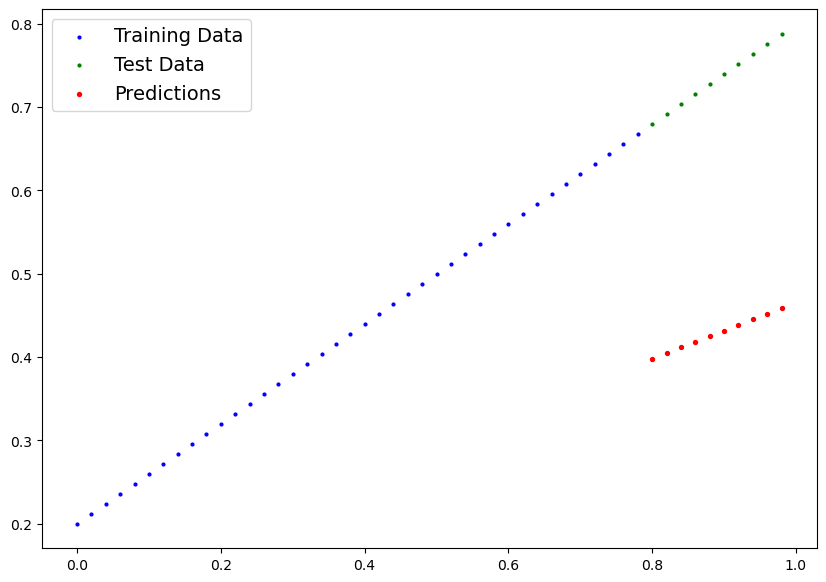

In [54]:
plot_predictions(predictions=y_preds)

<a id='3-fit-the-model'></a>
## 3. Train Model
The whole idea of training is for a model to move from some **unknown** parameters (random) to some **known** parameters.

Or in other words, from a poor representation of data to a better representation of the data.

One way to measure how poor or how wrong your models preidcitons are is to use **Loss Function**

**Loss Function** - is a function to measure how wrong your model's predictions are to the ideal outputs, lower is better.

**Optimizer** - Takes into account the loss of a model and adjusts the model's parameters (weight and bias)

What we need:
- A training loop
- A testing loop

In [55]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [56]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [57]:
# Setup a loss function
loss_fn = nn.L1Loss()

#Setup an optimizer (SGD - stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.01)

### Building a training loop and a testing loop

1. Loop through the data
2. Forward Pass (this involves data moving through our mdoel's `forward()` functions) to make predictions on data - also called forward propagation
3. Calculate the loss (compare forward pass predictions to ground truth labels)
4. Optimizer zero grad
5. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss. (backpropagation)
6. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (gradien descent)

In [58]:
# The loop through the data
epochs = 200

#Tracking different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
## Loop through the data
for epoch in range(epochs):
    #Set the model to training mode
    model_0.train() #train mode in PyTorch sets all parameters that requires gradient descent to require gradients

    # Forward Pass
    y_pred = model_0(X_train)

    #Calculate the loss
    loss = loss_fn(y_pred, y_train)

    #Optimizer zero grad
    optimizer.zero_grad()

    #Perform backpropagation
    loss.backward()

    #Step the optimizer
    optimizer.step() # how the optimize accumulate through the loop

    #Evaluate
    model_0.eval()

    with torch.inference_mode():

    # with torch.no_grad():
        # Forward Pass
        test_pred = model_0(X_test)

        #Calculate the Loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f'Epoch {epoch} | Loss: {loss} | Test Loss: {test_loss}')
        
        print(model_0.state_dict())

Epoch 0 | Loss: 0.17388135194778442 | Test Loss: 0.29206520318984985
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch 10 | Loss: 0.06607577949762344 | Test Loss: 0.16355101764202118
OrderedDict([('weights', tensor([0.3794])), ('bias', tensor([0.2328]))])
Epoch 20 | Loss: 0.039144229143857956 | Test Loss: 0.10241486877202988
OrderedDict([('weights', tensor([0.4099])), ('bias', tensor([0.2668]))])
Epoch 30 | Loss: 0.03429242596030235 | Test Loss: 0.08263428509235382
OrderedDict([('weights', tensor([0.4304])), ('bias', tensor([0.2683]))])
Epoch 40 | Loss: 0.030802428722381592 | Test Loss: 0.07161422073841095
OrderedDict([('weights', tensor([0.4484])), ('bias', tensor([0.2633]))])
Epoch 50 | Loss: 0.02735968492925167 | Test Loss: 0.0633416697382927
OrderedDict([('weights', tensor([0.4656])), ('bias', tensor([0.2563]))])
Epoch 60 | Loss: 0.0239248163998127 | Test Loss: 0.05506915599107742
OrderedDict([('weights', tensor([0.4827])), ('bias', tensor([0.2493]))])


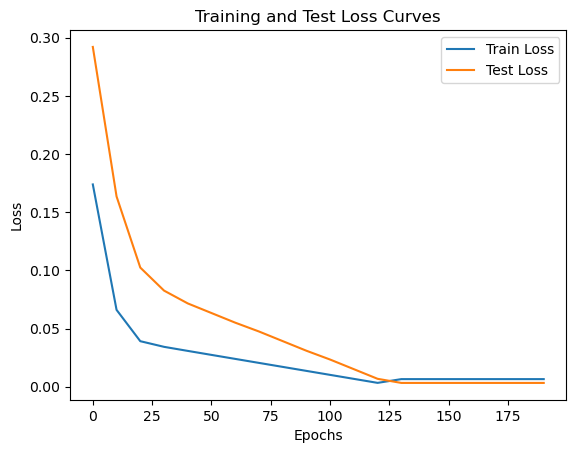

In [59]:
# Plot the curves
import numpy as np

plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label='Train Loss')
plt.plot(epoch_count, test_loss_values, label='Test Loss')
plt.title('Training and Test Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend();

In [47]:
print(model_0.state_dict())

OrderedDict([('weights', tensor([0.5966])), ('bias', tensor([0.2063]))])


In [48]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

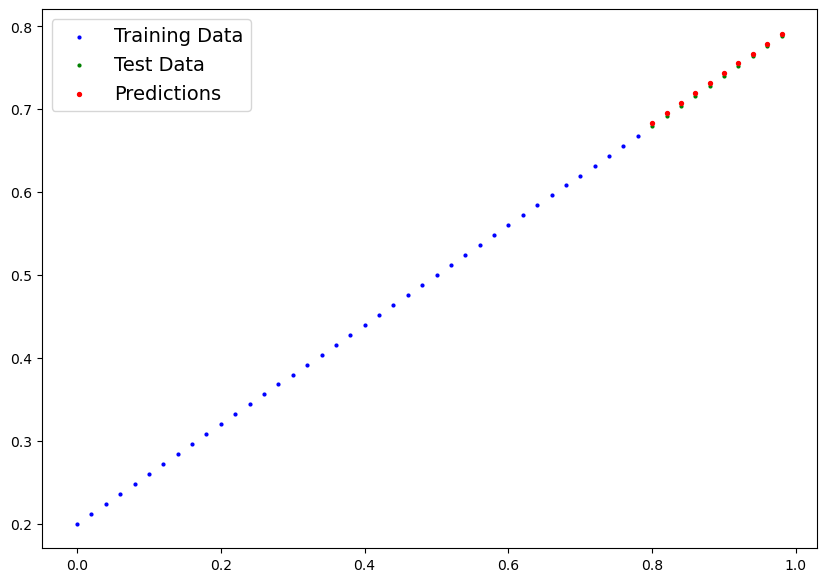

In [49]:
plot_predictions(predictions=y_preds_new)

In [ ]:
## Saving a model in PyTorch
1. `torch.save()` - allwos you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict - 